In [1]:
import pandas as pd
df=pd.read_csv('questions.csv')

In [2]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
df.shape

(404351, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404351.000000,404351.000000,404351.000000,404351.000000
mean,202175.000000,391840.987691,390195.973765,0.369248
std,116726.223686,228430.857607,228803.645742,0.482602
min,0.000000,1.000000,2.000000,0.000000
25%,101087.500000,193381.000000,191012.000000,0.000000
50%,202175.000000,390630.000000,388364.000000,0.000000
75%,303262.500000,589514.000000,588071.000000,1.000000
max,404350.000000,789800.000000,789801.000000,1.000000


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
df.shape

(404348, 6)

In [10]:
df.duplicated().sum()

0

In [11]:
df['is_duplicate'].value_counts()

is_duplicate
0    255042
1    149306
Name: count, dtype: int64

In [12]:
(df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100

is_duplicate
0    63.074876
1    36.925124
Name: count, dtype: float64

In [13]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7245e8d35810>,
 [Text(-0.43923614984151277, 1.0084996800556778, '0'),
  Text(0.43923614984151244, -1.0084996800556778, '1')],
 [Text(-0.23958335445900694, 0.5500907345758241, '63.07'),
  Text(0.23958335445900675, -0.5500907345758242, '36.93')])

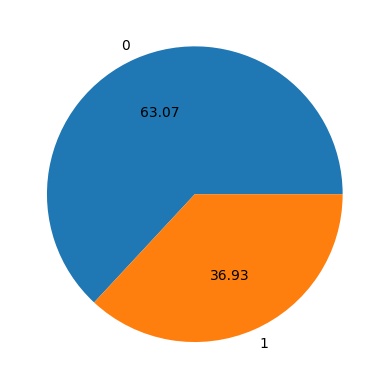

In [14]:
plt.pie(df['is_duplicate'].value_counts(),labels=['0','1'],autopct="%0.2f")

<Axes: xlabel='is_duplicate'>

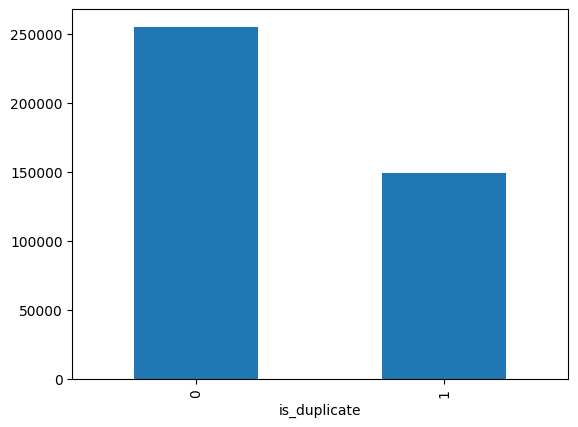

In [15]:
df['is_duplicate'].value_counts().plot(kind="bar")

## Observations 
1. Data is imbalanced

In [16]:
import numpy as np
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print("Total questions :",qid.shape[0])
print("No of Unique :",len(qid.unique()))
x=qid.value_counts()>1
print("No of repeated questions :",x.sum())

Total questions : 808696
No of Unique : 789795
No of repeated questions : 13698


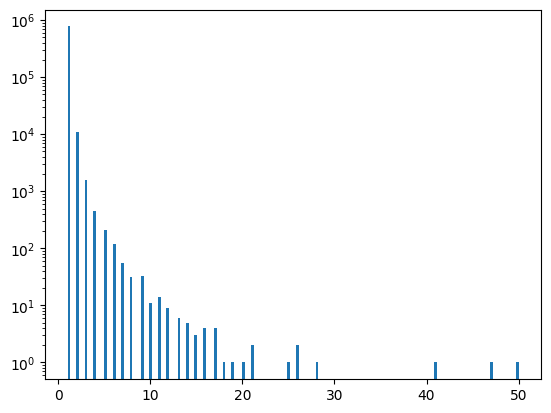

In [17]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [18]:
df.drop(columns=['id'],inplace=True)

In [19]:
df.shape

(404348, 5)

In [20]:
new_df=df.sample(30000)

In [21]:
ques_df=new_df[['question1','question2']]

In [25]:
ques_df.shape

(30000, 2)

In [26]:
new_df.shape

(30000, 5)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

questions=list(ques_df['question1'])+list(ques_df['question2'])

In [28]:
len(questions)

60000

In [29]:
cv=CountVectorizer(max_features=3000)

In [30]:
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [31]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)

In [32]:
temp_df1.shape

(30000, 3000)

In [33]:
temp_df2.shape

(30000, 3000)

In [34]:
temp_df.shape

(30000, 6000)

In [35]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
167349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [37]:
temp_df.shape

(30000, 6001)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=42)

In [39]:
X_train.shape

(24000, 6000)

In [40]:
y_train.shape

(24000,)

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf=RandomForestClassifier()

In [43]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
y_pred=clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
print("Accuracy of Random Forest: ",accuracy_score(y_test,y_pred))

Accuracy of Random Forest:  0.752


In [49]:
from xgboost import XGBClassifier

In [50]:
xgb=XGBClassifier()

In [51]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
y_pred=xgb.predict(X_test)

In [53]:
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.7405


In [55]:
import sklearn


In [57]:
dir(sklearn.naive_bayes)

['ABCMeta',
 'BaseEstimator',
 'BernoulliNB',
 'CategoricalNB',
 'ClassifierMixin',
 'ComplementNB',
 'GaussianNB',
 'Integral',
 'Interval',
 'LabelBinarizer',
 'MultinomialNB',
 'Real',
 '_BaseDiscreteNB',
 '_BaseNB',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_check_n_features',
 '_check_partial_fit_first_call',
 '_check_sample_weight',
 '_fit_context',
 'abstractmethod',
 'binarize',
 'check_is_fitted',
 'check_non_negative',
 'label_binarize',
 'logsumexp',
 'np',
 'safe_sparse_dot',
 'validate_data',
 'warnings']

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [59]:
GNB=GaussianNB()
MNB=MultinomialNB()
BNB=BernoulliNB()

In [60]:
GNB.fit(X_train,y_train)
MNB.fit(X_train,y_train)
BNB.fit(X_train,y_train)

BernoulliNB()

In [61]:
y_pred=GNB.predict(X_test)
accuracy_score(y_test,y_pred)

0.575

In [62]:
y_pred=MNB.predict(X_test)
accuracy_score(y_test,y_pred)

0.7211666666666666

In [63]:
y_pred=BNB.predict(X_test)
accuracy_score(y_test,y_pred)

0.709